### Basic imports

In [31]:
import tensorflow as tf
import tensorflow.keras as keras
# just using backed up model, so these aren't used
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
# for more detailed optimizing?
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np

### Preparing data
Based on how I organized my own folders
### and loading model

In [23]:
train_data = keras.utils.image_dataset_from_directory(
    directory='Cat-Dog-CNN-Classifier-master/train/',
    batch_size=32,
    image_size=(64, 64),
    shuffle=False)
val_data = keras.utils.image_dataset_from_directory(
    directory='Cat-Dog-CNN-Classifier-master/test/',
    batch_size=32,
    image_size=(64, 64),
    shuffle=False)
# print(train_data.class_names)

Found 23000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [38]:
from tensorflow.keras.models import load_model
classifier = load_model('Cat-Dog-CNN-Classifier-master/resources/dogcat_model_bak.h5')

### Testing

In [ ]:
# Check 9 images

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(images[i]).astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

In [28]:
# The model structure -- 
# I ran into issues with their specific optimizer (Nonetype error) but also just using 'adam' works...very badly

model = Sequential()
model.add(keras.layers.Rescaling(1./255))
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

1/1 [==============================] - 0s 16ms/step


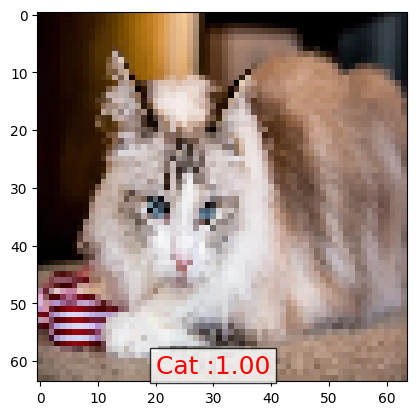

In [ ]:
# Predicting a specific image -- to quickly confirm accuracy

#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
# img_path = 'Cat-Dog-CNN-Classifier-master/test/Cat/cat.10.jpg'
# img_path = 'own-imgs/dog/01_yuki.jpg'
# img_path = 'own-imgs/dog/02_catlike_dog.jpg'
img_path = 'own-imgs/cat/01_cat.webp'
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


In [1]:
# Another example of testing a model? I used this on the toy version I trained with 10 epochs and it did very bad

from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_set1 = test_datagen.flow_from_directory('Cat-Dog-CNN-Classifier-master/test1/',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('Cat-Dog-CNN-Classifier-master/test1/'+test_set1.filenames[np.random.choice(range(12500))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


Found 12500 images belonging to 1 classes.


NameError: name 'plt' is not defined